In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def merge_DataFrames(df1, df2, df3):

    final_df = pd.DataFrame()

    final_df['XGBoost_DSC'] = df1['Dice_coefficient']
    final_df['NaiveBayes_DSC'] = df2['Dice_coefficient']
    final_df['KNN_DSC'] = df3['Dice_coefficient']

    return final_df

In [10]:
XGboost_path = f'../../../Results/Other_ML_Algorithms/XGBClassifier_Results/results.csv'
NaiveBayes_path = f'../../../Results/Other_ML_Algorithms/GaussianNB_Results/results.csv'
KNN_path = f'../../../Results/Other_ML_Algorithms/KNeighborsClassifier_Results/results.csv'

In [11]:
XGboost_df = pd.read_csv(XGboost_path)
NaiveBayes_df = pd.read_csv(NaiveBayes_path)
KNN_df = pd.read_csv(KNN_path)

In [12]:
df = merge_DataFrames(XGboost_df, NaiveBayes_df, KNN_df)

0.8297764535244952
0.7921037386056675
0.8299884130007249


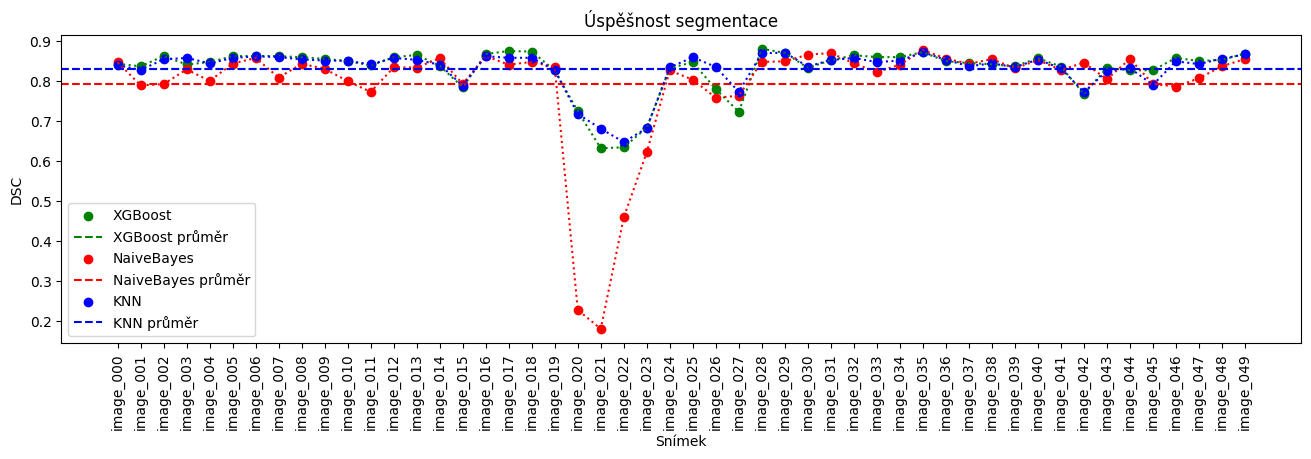

In [13]:
col_names = list(df.columns)
colors = ['g', 'r', 'b']
names = [f'image_{i:03}' for i in range(df.shape[0])]
x = [i for i in range(df.shape[0])]

plt.figure(figsize=(16,4))

for i, (column,color) in enumerate(zip(col_names, colors)):
    plt.plot(x, df[column], color=color, linestyle=':')
    plt.scatter(x, df[column], marker='o', color=color, label=column[:-4])

    plt.axhline(y=df[column].mean(), color=color, linestyle='--', label=f'{column[:-4]} průměr')

    print(df[column].mean())

# Settings
plt.title('Úspěšnost segmentace')
plt.xlabel('Snímek')
plt.ylabel('DSC')
plt.legend(loc='best')
plt.xticks(x, labels=names)
plt.tick_params(axis='x', rotation=90)
plt.show()

In [17]:
index_min = df['KNN_DSC'].idxmin()

index_max = df['KNN_DSC'].idxmax()

print("Index minimální hodnoty:", index_min, "Hodnota DSC:", df.at[index_min, 'KNN_DSC'])
print("Index maximální hodnoty:", index_max, "Hodnota DSC:", df.at[index_max, 'KNN_DSC'])


Index minimální hodnoty: 22 Hodnota DSC: 0.6471547671219312
Index maximální hodnoty: 35 Hodnota DSC: 0.8714031354127401


In [18]:
mean_value = df['KNN_DSC'].mean()

df['LinearSVC_DSC_deviation'] = abs(df['KNN_DSC'] - mean_value)

index_min_dev = df['LinearSVC_DSC_deviation'].idxmin()

print("Index minimální odchylky:", index_min_dev, "Hodnota DSC:", df.at[index_min_dev, 'KNN_DSC'])

Index minimální odchylky: 41 Hodnota DSC: 0.8315644610442939
